To run the code in Python, complete the following steps

`python3 -m venv eeng415_hw7`

`pip3 install ipykernel keras tensorflow==2.12.* pandas numpy matplotlib`

There are sometimes issues with installing tensorflow (Certain versions of python are incompatible with tensorflow), but it should work on 64-bit Python 3.8.16

In [4]:
x1 = [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1] # +
x2 = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1] # O
x3 = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1] # <
x4 = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # S
x5 = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] # psi
x6 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1] # >

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import random

model = Sequential()
model.add(Dense(12, input_dim =26, activation = 'relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# to build training data. 
# index of ANN_TRUTH_SET_X matches index of one-hot encoded response in ANN_TRUTH_SET_Y
ANN_TRUTH_SET_X = [x1, x2, x3, x4, x5, x6]
ANN_TRUTH_SET_Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

LEN_OF_TRAINING_DATA = 1000

X = [x1, x2, x3, x4, x5, x6]
Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

for i in range(LEN_OF_TRAINING_DATA):
    # choose random integer to add that index of ANN_TRUTH_SET to training data
    rand_int = random.randint(0, 5) 
    X.append(ANN_TRUTH_SET_X[rand_int])
    Y.append(ANN_TRUTH_SET_Y[rand_int])

X = np.array(X)
Y = np.array(Y)


#scores = model

In [6]:
history = model.fit(X, Y, epochs = 150, batch_size=10)

Epoch 1/150
101/101 [==============================] - 0s 875us/step - loss: 0.1149 - accuracy: 0.5060
Epoch 2/150
101/101 [==============================] - 0s 830us/step - loss: 0.0665 - accuracy: 0.8121
Epoch 3/150
101/101 [==============================] - 0s 820us/step - loss: 0.0339 - accuracy: 0.9404
Epoch 4/150
101/101 [==============================] - 0s 829us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 5/150
101/101 [==============================] - 0s 811us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 6/150
101/101 [==============================] - 0s 777us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 7/150
101/101 [==============================] - 0s 783us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/150
101/101 [==============================] - 0s 772us/step - loss: 9.7357e-04 - accuracy: 1.0000
Epoch 9/150
101/101 [==============================] - 0s 760us/step - loss: 7.0521e-04 - accuracy: 1.0000
Epoch 10/150
101/101 [==============================] - 0s 775us/

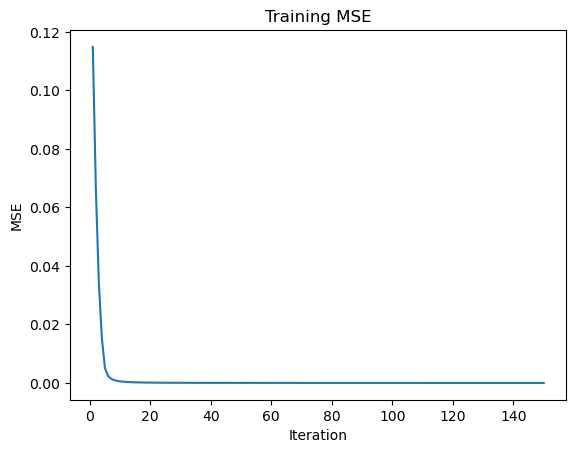

In [7]:
import matplotlib.pyplot as plt

iterations = len(history.history['loss'])
iteration_number_for_plot = [iteration for iteration in range(1, iterations + 1)]

plt.plot(
    iteration_number_for_plot,
    history.history['loss']
)
plt.title('Training MSE')
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.show()

In [8]:
model.predict(np.array([x1, x2, x3, x4, x5, x6])).argmax(axis=1)

1/1 [==============================] - 0s 58ms/step


array([0, 1, 2, 3, 4, 5])

# Testing for Noisy Inputs

In [9]:
def replace_input(array, idx):

    current_val = array[idx]
    new_val = 1 if current_val == 0 else 0
    
    new_array = list(array)
    new_array[idx] = new_val

    return new_array

In [10]:
replacement_bits = random.sample(range(0, 24), 24)

def replace_and_predict(original_array, expected_prediction, replacement_bits, model):
    new_array = list(original_array)

    for elements_replaced, idx_to_replace in enumerate(replacement_bits):
        new_array = replace_input(new_array, idx_to_replace)
        if model.predict(np.array([new_array])).argmax(axis=1)[0] != expected_prediction:
            raise ValueError(f"ANN didn't predict output correctly after {elements_replaced + 1} elements changed\n\nOriginal Array:\n{original_array}\n\nNoisy Array:\n{new_array}")

print(f"The following indices of the original array will be replaced in this order:\n\n{replacement_bits}")


The following indices of the original array will be replaced in this order:

[19, 9, 2, 0, 13, 15, 14, 23, 18, 11, 17, 21, 7, 8, 16, 3, 4, 20, 10, 12, 1, 6, 22, 5]


In [11]:
replace_and_predict(x1, 0, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 6 elements changed

Original Array:
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

Noisy Array:
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [12]:
replace_and_predict(x2, 1, replacement_bits, model)

1/1 [==============================] - 0s 21ms/step


ValueError: ANN didn't predict output correctly after 11 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

In [13]:
replace_and_predict(x3, 2, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 11 elements changed

Original Array:
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

Noisy Array:
[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

In [14]:
replace_and_predict(x4, 3, replacement_bits, model)

1/1 [==============================] - 0s 22ms/step


ValueError: ANN didn't predict output correctly after 11 elements changed

Original Array:
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Noisy Array:
[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]

In [15]:
replace_and_predict(x5, 4, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 6 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]

In [16]:
replace_and_predict(x6, 5, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 5 elements changed

Original Array:
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

Noisy Array:
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]